In [2]:
# Make sure the plot shows up
%matplotlib inline

# Import libraries that we need
import pandas as pd 
import numpy as np


In [3]:
df = pd.DataFrame(
    np.arange(10, 22).reshape(4, 3),
    columns=["A", "B", "C"]
)
print(df['A'])


0    10
1    13
2    16
3    19
Name: A, dtype: int64


In [4]:

print(df['A'].rolling(2).mean())

0     NaN
1    11.5
2    14.5
3    17.5
Name: A, dtype: float64


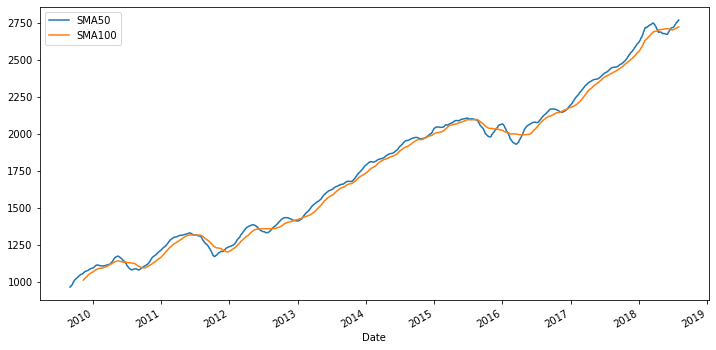

In [6]:
# Read the data from disk
data = pd.read_csv('sp500.csv', index_col='Date', parse_dates=['Date'])

# Calculate two moving averages
data['SMA50'] = data['SP500'].rolling(50).mean()
data['SMA100'] = data['SP500'].rolling(100).mean()
data[['SMA50', 'SMA100']].plot(figsize=(12,6))

In [10]:
df = pd.DataFrame(
    np.arange(10, 22).reshape(4, 3),
    columns=["A", "B", "C"]
)
df

,A,B,C
0,10,11,12
1,13,14,15
2,16,17,18
3,19,20,21


In [12]:
df['C_pctchange'] = df['C'].pct_change(1)
df

,A,B,C,C_pctchange
0,10,11,12,NaN
1,13,14,15,0.250000
2,16,17,18,0.200000
3,19,20,21,0.166667


In [13]:
df['c_pctcange+1'] = (df['C_pctchange'] + 1)
df

,A,B,C,C_pctchange,c_pctcange+1
0,10,11,12,NaN,NaN
1,13,14,15,0.250000,1.250000
2,16,17,18,0.200000,1.200000
3,19,20,21,0.166667,1.166667


In [15]:
df['c_pctcange+1CumProd'] = (df['c_pctcange+1'] + 1).cumprod()
df

,A,B,C,C_pctchange,c_pctcange+1,c_pctcange+1CumProd
0,10,11,12,NaN,NaN,NaN
1,13,14,15,0.250000,1.250000,2.250
2,16,17,18,0.200000,1.200000,4.950
3,19,20,21,0.166667,1.166667,10.725


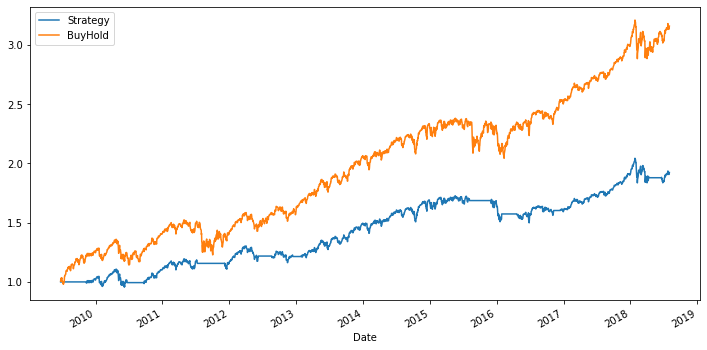

In [9]:


# Set to 1 if SMA50 is above SMA100
data['Position'] = np.where(data['SMA50'] > data['SMA100'], 1, 0)

# Buy a day delayed, shift the column
data['Position'] = data['Position'].shift()

# Calculate the daily percent returns of strategy
data['StrategyPct'] = data['SP500'].pct_change(1) * data['Position']

# Calculate cumulative returns
data['Strategy'] = (data['StrategyPct'] + 1).cumprod()

# Calculate index cumulative returns
data['BuyHold'] = (data['SP500'].pct_change(1) + 1).cumprod()

# Plot the result
data[['Strategy', 'BuyHold']].plot(figsize=(12,6))



In [8]:
data.to_clipboard()